# *The Fluid as a Continuum*

There is space between molecules making up mater that is in different states. This space varies with the state that the matter is in, and the intermolecular force between the molecules. So, to measure the fluid properties, what $\delta V$ must one examine the matter to preserve the continuity of the properties. As an example, let’s look at determining density at a point. Density is described as 
$$\rho = \frac{\delta m} {\delta V}$$
where $\delta m$ is mass and $\delta V$ is volume. When analyzing $\delta V$ that is very small, molecules are constantly moving in and out of the region being examined. This random movement of molecules in and out of the region will result in a phenomenon called microscopic uncertainty. This random movement of molecules in and out of the region is not equal; one of the major contributing factor to that is the spacing of molecules. Therefore, it is imperative to determine the sampling volume of $\delta V^*$ that is not too tiny to result in the microscopic uncertainty and too big to pick up the finer processes taking place. In order to mathematically describe how to choose the right dimensions for $\delta V^*$ one must assume the measured average density within the region gets closer to the actual density of the matter being examined, this process is described by

$$\rho =  \lim_{\delta V \to \delta V^*} \frac{\delta m} {\delta V} $$

Where $\delta V^*$ the ideal size of sample volume that preserves the continuity of this discontinuous liquid.

## This Excercise
In this exercise, the fluid property that is being examined is the density of matter. This density is calculated as 

$$\rho = \frac{n \delta m }{\delta x \times \delta y}$$

where $n$ the number of particles in the region, $\delta m$ is mass of a particle (unit mass), $\delta x$ horizontal length in the x-axis of the sample volume (unit length) and $\delta y$ vertical length in the y-axis of the sample volume (unit length). $\delta x \times \delta y$ is 2D volume (cubic units).


### Createing the sample and populate it

In [1]:
def populate(dx,dy,d):
    import numpy as np
    """
    
    Assumption:
        The mass of each particle is 1 unit mass
    
    This function generates a 2D array of size dx x dy and randomly populates 
    it with particles of value 1 and empty space of 0. 
    
    The array can be populated to result in a specific density using 'd'. The 
    Governing equation is 
    
    dencity = (number of particles)x(mass of one particle)/(2D volume)


    Parameters
    ----------
    dx : horizontal unit length of the volume section
    dy : virtical unit length of the volume section
    d : expected dencity

    Returns
    -------
    array : an array populated with particles with a dencity of 'd'

    """
    
    nums = np.ones(dx*dy)                          # 2D array of the 'container' to be populated
    nums[:(dx*dy)-int(d*(dx*dy))] = 0              # Defineing the density of the matter in the container
    np.random.shuffle(nums)                        # Randomly shuffling the populated array to simulate the
                                                   # random nature of particles makeing up matter in nature
    array = np.reshape(np.array(nums), (-1, dx))   
                    
    return array

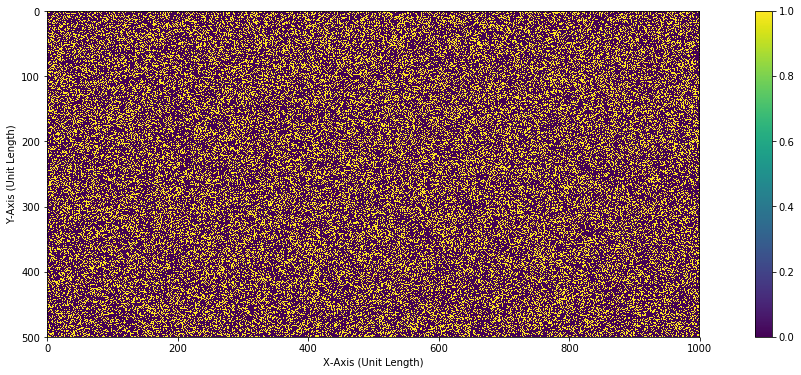

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dx,dy = 1000,500           # Dimention of the container
d=0.3                      # Dimention of the container

sample_size = min(dx,dy)

array1 =populate(dx,dy,d)


%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 6]
plt.imshow(array1)
plt.xlabel('X-Axis (Unit Length)')
plt.ylabel('Y-Axis (Unit Length)')
plt.colorbar()
plt.show()

### Measuring The Density As a Result Of The Change In Sample Volume

In [3]:
def animate(array,sample_size):
    """
    
    This function takes in the generated array and the desired sample size, which
    is the total number of particles + the empty space in the array, and iterates 
    through a wide range of horizontal length which is used to determine the sample 
    volume. At each iteration, the density is calculated assuming a mass of a molecule 
    is assumed to be 1 unit mass.
    

    Parameters
    ----------
    array: a generated array of the particles and free space that is in the 
            simulated container.
    sample_size: the total number of particles + the empty space in the container

    Returns
    -------
    d: density at each iteration of the horizontal length which is used to determine the sample 
        volume
    vv: the horizontal length which is used to determine the sample volume
    nn: Number of particles in the sample volume at any 'vv'


    """
    
    import numpy as np
    
    d = []
    vv = []
    nn = []
    for i in np.arange(1,sample_size,1):
        n = len(array[0:i,0:i][array[0:i,0:i]==1])
        v = i*i
        ds = n/v
        vv.append(i)
        nn.append(n)
        d.append(ds)
    return d,vv,nn

### Simulating Flowing Particles (Horizontally, With No Interactions Between Them)
Assumptions:
* The particles do not interact with each other 
* The particles are flowing horizontaly from right to left.

This is simulated by moveing the sample volume from left to right by slicing the array that contains the particles and measuring the fluid properties per iteration (time step).


In [4]:
def time_run(array,dx,dl):
    """
    This function moves the shifts the sample volume area
    from left to right to simulate horizontaly moving particles.
    at every timestep  
    Parameters
    ----------
    array : generated array of the particles and free space that is in the 
            simulated container.
    dx : horizontal unit length of the volume section

    dl : 2D sample volume = dl*dl

    Returns
    -------
    vv : Sample Volume
    nn : Number of particles in Sample Volume
    d :Density of the particles in the sample volume
    t : Time step

    """
    import numpy as np
    
    d = []
    cd = []
    vv = []
    nn = []
    t=[]
    ds=0
    for i in np.arange(0,dx,1):     
        if i+dl < dx:
            n = len(array[:dl,i:i+dl][array[:dl,i:i+dl]==1])
            v = dl**2
            cd.append(n/v-ds)
            ds = n/v
            vv.append(np.sqrt(v))
            nn.append(n)
            d.append(ds)
            t.append(i)
    return vv,nn,d,t,cd

### Plotting the Results

In [37]:
def find_nearest(array, value):    
    import numpy as np
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def plot(dx,dy,d,dl,diviation):
    """
    This function generates 3 containers with the same density of particles 
    but the particles are reshuffled. 

    Parameters
    ----------
    dx: horizontal unit length of the volume section
    by: vertical unit length of the volume section
    d: expected density
    dl : 2D sample volume = dl*dl
    
    deviation: adjusting the ylimits of the plots 

    Returns
    -------
    recomended_Dl: the recommended dl that can satisfy the continuum hypothesis

    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    sample_size = min(dx,dy)

    array1 =populate(dx,dy,d)
    d1,vv1,nn1 = animate(array1, sample_size)
    
    
    array2 =populate(dx,dy,d)
    d2,vv2,nn2 = animate(array2, sample_size)
    
    
    array3 =populate(dx,dy,d)
    d3,vv3,nn3 = animate(array3, sample_size)
    
    
    
    vvv,nnv,dv,tv,cdv = time_run (array1,dx,dl)
    vvv2,nnv2,dv2,tv2,cdv2 = time_run (array2,dx,dl)
    vvv3,nnv3,dv3,tv3,cdv3 = time_run (array3,dx,dl)
    
    fig = plt.figure(figsize=(15,7))   
    plt.figure(1)
    
    ax = plt.subplot(212)
    ax.imshow(array3)
    ax.plot((dl,dl),(0,dl),'k')
    ax.plot((0,dl),(dl,dl),'k')
    ax.set_title( r'Sample Size Example')
    
    ax1 = plt.subplot(221)
    ax1.plot(vv1,d1,label='Particle Shuffle 1')
    ax1.plot(vv2,d2,label='Particle Shuffle 2')
    ax1.plot(vv3,d3,label='Particle Shuffle 3')
    ax1.plot((0,max(vv2)),(d,d),'k',label='Dencity of the sample')
    ax1.set_xlim(min(vv1),max(vv1))
    ax1.set_ylim(d-d*diviation,d+d*diviation)
    ax1.set_xlabel('Length Scale')
    ax1.set_ylabel( r'$\rho$ ($n \times m/v$)')
    ax1.legend()
    
    
    ax1 = plt.subplot(222)
    ax1.plot(np.array(tv),np.array(dv),label='Particle Shuffle 1')
    ax1.plot(np.array(tv2),np.array(dv2),label='Particle Shuffle 2')
    ax1.plot(np.array(tv3),np.array(dv3),label='Particle Shuffle 3')
    ax1.plot((0,max(tv2)),(d,d),'k',label='Dencity of the sample')
    ax1.set_ylim(d-d*diviation,d+d*diviation)
    ax1.set_xlim(0,max(tv))
    ax1.set_xlabel('Time Scale')
    ax1.set_ylabel( r'$\rho$ ($n \times m/v$)')
    ax1.legend()
    
    plt.show()
    fig.tight_layout()
    
    perfect_d = np.ones_like(d1)*d
    
    d_matrix = np.abs(np.median(np.array([d1-perfect_d,d2-perfect_d,d3-perfect_d]),axis=0))
    recomended_Dl = np.where(d_matrix == find_nearest(d_matrix, 1e-04))[0][0]
    print('The recomended value for the side length used to calculate 2D sample volume is:' + str(recomended_Dl))
#    return recomended_Dl

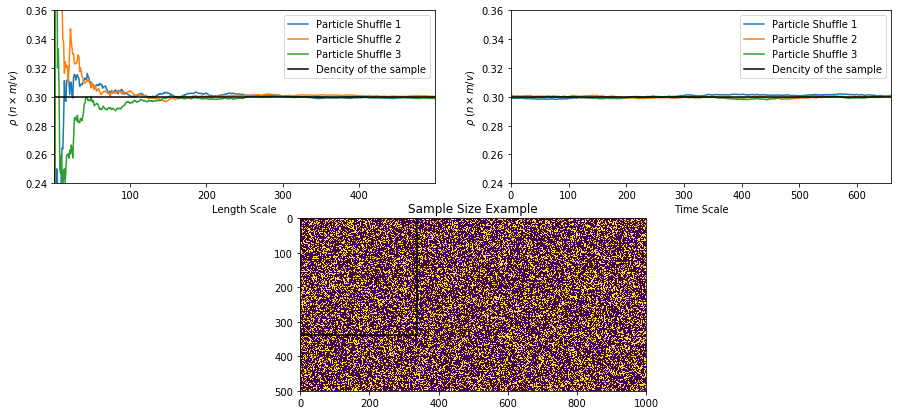

The recomended value for the side length used to calculate 2D sample volume is:299


In [36]:
dl=339                     # Unit length of sides of the sampleing volume
diviation = 0.2            # Dimention of the container

plot (dx,dy,d,dl,diviation)

The microscopic uncertainty is picked up for length scale rangeing 1 to 200. Thereafter, the microscopic uncertainty is nolonger present. Therefore, the length scale ($dl$) used to determine the $1D$ sample volume.